# Handling Missing Values  

> from Latin "imputare", meaning to attribute or compute, aptly describing the act of assigning estimated values to missing data.  

This example generates a synthetic dataset for QuantumLabs, introduces missing values, applies mean and mode imputation, visualizes the results, and summarizes findings.  

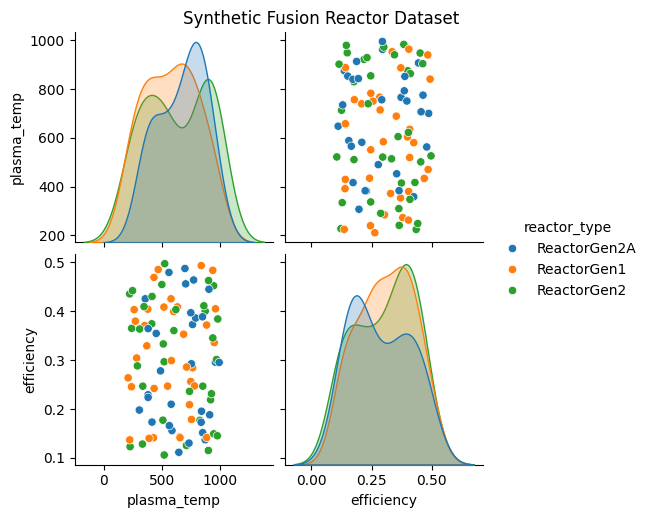

In [12]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 

# Step 1. Generate synthetic fusion reactor dataset
rng = np.random.RandomState(42)
n_samples = 100
df = pd.DataFrame({
    'plasma_temp' : rng.uniform(1000, 200, n_samples),  # Kelvin
    'efficiency' : rng.uniform(0.5, 0.1, n_samples),    # 0-1 Scale
    'reactor_type' : rng.choice(['ReactorGen1', 'ReactorGen2', 'ReactorGen2A'], n_samples)
})

# Visualize the dataset
sns.pairplot(df, hue='reactor_type')
plt.suptitle('Synthetic Fusion Reactor Dataset', y=1.02)
plt.show()

# Introduce missing values (20% for each column)
df.loc[rng.choice(df.index, size=3), 'plasma_temp'] = np.nan
df.loc[rng.choice(df.index, size=3), 'efficiency'] = np.nan
df.loc[rng.choice(df.index, size=3), 'reactor_type'] = None

In [15]:
# Step 2. Apply simple imputation
from sklearn.impute import SimpleImputer

df_imputed = df.copy()

#Numeric: Mean imputation
num_imputer = SimpleImputer(strategy='mean')
df_imputed[['plasma_temp', 'efficiency']] = num_imputer.fit_transform(df_imputed[['plasma_temp', 'efficiency']])

print("Numeric columns after mean imputation:\n", df_imputed[['plasma_temp', 'efficiency']].head())

# Categorical: Most frequent imputation
cat_imputer = SimpleImputer(strategy='most_frequent')
df_imputed[['reactor_type']] = cat_imputer.fit_transform(df_imputed[['reactor_type']])

print("Categorical columns after most frequent imputation:\n", df_imputed[['reactor_type']].head())


Numeric columns after mean imputation:
    plasma_temp  efficiency
0   700.367905    0.487428
1   239.428555    0.245436
2   414.404847    0.374258
3   521.073213    0.296572
4   875.185088    0.136973
Categorical columns after most frequent imputation:
    reactor_type
0  ReactorGen2A
1   ReactorGen1
2   ReactorGen2
3   ReactorGen2
4  ReactorGen2A


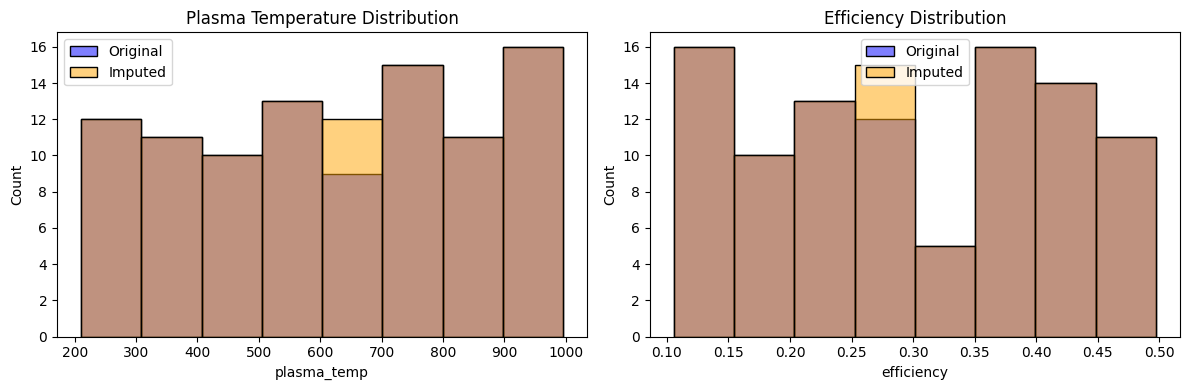

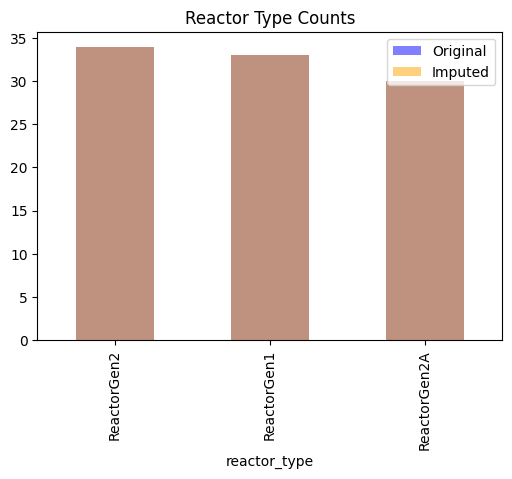

In [20]:
# Step 3: Visualize original vs. imputed distributions
plt.figure(figsize=(12, 4))

# Plasma temperature
plt.subplot(1, 2, 1)
sns.histplot(df['plasma_temp'], label='Original', alpha=0.5, color='blue')
sns.histplot(df_imputed['plasma_temp'], label='Imputed', alpha=0.5, color='orange')
plt.title('Plasma Temperature Distribution')
plt.legend()

# Efficiency
plt.subplot(1, 2, 2)
sns.histplot(df['efficiency'], label='Original', alpha=0.5, color='blue')
sns.histplot(df_imputed['efficiency'], label='Imputed', alpha=0.5, color='orange')
plt.title('Efficiency Distribution')
plt.legend()

plt.tight_layout()
plt.show()

# Reactor type (bar plot for categorical)
plt.figure(figsize=(6, 4))
pd.Series.value_counts(df['reactor_type'], dropna=False).plot(kind='bar', alpha=0.5, label='Original', color='blue')
pd.Series.value_counts(df_imputed['reactor_type']).plot(kind='bar', alpha=0.5, label='Imputed', color='orange')
plt.title('Reactor Type Counts')
plt.legend()
plt.show()

In [21]:
# Step 4: Summarize findings
summary = f"""
Imputation Summary for QuantumLabs
================================
- Dataset: {n_samples} reactor experiments, ~20% missing values.
- Methods: Mean imputation (plasma_temp, efficiency), mode imputation (reactor_type).
- Observations:
  - Mean imputation fills gaps but may flatten distributions, especially for plasma_temp.
  - Mode imputation increases frequency of dominant reactor_type ({df_imputed['reactor_type'].mode()[0]}).
- Next Steps: Explore KNN or MICE for better pattern preservation.

Prepared by: R. Brandon Thompson
"""
print(summary)


Imputation Summary for QuantumLabs
- Dataset: 100 reactor experiments, ~20% missing values.
- Methods: Mean imputation (plasma_temp, efficiency), mode imputation (reactor_type).
- Observations:
  - Mean imputation fills gaps but may flatten distributions, especially for plasma_temp.
  - Mode imputation increases frequency of dominant reactor_type (ReactorGen2).
- Next Steps: Explore KNN or MICE for better pattern preservation.

Prepared by: R. Brandon Thompson

